In [1]:
!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.5 MB/s eta 0:00:00


In [2]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 95.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.5 MB/s eta 0:00:00


In [3]:
xml_loc = '/content/drive/MyDrive/data/xml_20230628-1.csv'

In [4]:
import glob
import os
import json
import pandas as pd
import pickle

jsons = []
samples = []

xml_csv = pd.read_csv(xml_loc)

keyword = xml_csv['keyword']

In [5]:
keyword_per_xml = []
keyword_sum = []

for i in range(len(keyword)):
  temp = (list ( set ( str( keyword[i] ).split('|') ) ) )

  keyword_per_xml.append( [element for element in temp if not element.isdigit()] )

  keyword_sum+=str(keyword[i]).split('|')

keyword_sum = list(set(keyword_sum))

print(len(keyword_sum) )
print(len(keyword_per_xml))

print(keyword_per_xml[0])
print(keyword_sum[:20])

42277
59525
['가전', '모던한', '베이지감성적인', '녹색', '소상공인', '할인', '그림', '일러스트', '모던', '초록색', '광고', '홍보', '모음전', '소박한', '초록', '잔잔한', '이벤트', '여름', '반려동물', '상세페이지', '기본', '단순', '심플', '인테리어', '기획전', '그린', '친군한', '편안한', '홈캉스', '가구', '심플한']
['완료', '사이버수사대', '수업수칙', '85858', '67658', '이보영', '108622', '102418', '먹', '80980', '80650', '메탈', '89990', '가상화폐사기', '리뉴얼', '89400', '응원떡', '게임컨셉', '판타스틱', '대마']


In [6]:
from collections import Counter

#keyword_per_xml =  result_per_line

# 문장들을 담은 리스트
sentences = keyword_per_xml

# 전체 리스트의 단어 출현 빈도를 저장할 Counter 객체 생성
word_freq_counter = Counter()

# 각 문장의 단어 출현 빈도를 누적하여 Counter에 추가
for idx in range(len(sentences)):
    word_freq_counter.update(sentences[idx])

# 전체 리스트의 단어 출현 빈도로 정렬된 결과 얻기
sorted_word_freq = word_freq_counter.most_common()

print(sorted_word_freq)
print(len(sorted_word_freq))

[('심플', 11797), ('일러스트', 11107), ('프레젠테이션', 10499), ('ppt', 8601), ('비즈니스', 6943), ('회사', 6866), ('이벤트', 6547), ('기업', 6338), ('발표', 6107), ('라인', 5811), ('홍보', 5574), ('교육', 5565), ('귀여운', 4961), ('학생', 4929), ('도형', 4877), ('모던', 4720), ('사진', 4581), ('가로', 4492), ('그래프', 4285), ('안내', 4144), ('목록', 3964), ('분할', 3950), ('마케팅', 3783), ('카페', 3766), ('플랫한', 3751), ('아이콘', 3738), ('대학생', 3720), ('행사', 3702), ('할인', 3668), ('구로구', 3591), ('프레임', 3383), ('과제', 3351), ('표', 3317), ('학교', 3156), ('심플한', 3135), ('카드뉴스', 3118), ('깔끔', 3073), ('서울시', 3055), ('노랑', 3052), ('학원', 2929), ('소개', 2755), ('강조', 2728), ('텍스트', 2719), ('화이트', 2616), ('강의', 2587), ('명함', 2552), ('수업', 2493), ('보고서', 2415), ('설명', 2385), ('디지털로', 2336), ('제안서', 2284), ('쇼핑몰', 2274), ('초록', 2256), ('여름', 2239), ('디자인', 2229), ('상세페이지', 2228), ('그라데이션', 2214), ('베이지', 2190), ('요식업', 2182), ('포트폴리오', 2127), ('하늘색', 2126), ('피피티', 2121), ('파랑', 2078), ('커피', 2078), ('핑크', 2076), ('캐릭터', 2071), ('깔끔한', 1977), ('문의', 1967), 

In [8]:
data_dict = dict(sorted_word_freq)

print(data_dict)

{'심플': 11797, '일러스트': 11107, '프레젠테이션': 10499, 'ppt': 8601, '비즈니스': 6943, '회사': 6866, '이벤트': 6547, '기업': 6338, '발표': 6107, '라인': 5811, '홍보': 5574, '교육': 5565, '귀여운': 4961, '학생': 4929, '도형': 4877, '모던': 4720, '사진': 4581, '가로': 4492, '그래프': 4285, '안내': 4144, '목록': 3964, '분할': 3950, '마케팅': 3783, '카페': 3766, '플랫한': 3751, '아이콘': 3738, '대학생': 3720, '행사': 3702, '할인': 3668, '구로구': 3591, '프레임': 3383, '과제': 3351, '표': 3317, '학교': 3156, '심플한': 3135, '카드뉴스': 3118, '깔끔': 3073, '서울시': 3055, '노랑': 3052, '학원': 2929, '소개': 2755, '강조': 2728, '텍스트': 2719, '화이트': 2616, '강의': 2587, '명함': 2552, '수업': 2493, '보고서': 2415, '설명': 2385, '디지털로': 2336, '제안서': 2284, '쇼핑몰': 2274, '초록': 2256, '여름': 2239, '디자인': 2229, '상세페이지': 2228, '그라데이션': 2214, '베이지': 2190, '요식업': 2182, '포트폴리오': 2127, '하늘색': 2126, '피피티': 2121, '파랑': 2078, '커피': 2078, '핑크': 2076, '캐릭터': 2071, '깔끔한': 1977, '문의': 1967, '종이': 1949, '광고': 1948, '개인': 1913, '음식': 1907, '세일': 1894, '꽃': 1892, '선물': 1892, '미니멀': 1857, '비즈': 1816, '밝은': 1806, '인포그래픽': 1770, '

In [9]:
len_of_keyword = []
for i in range(1,50):
  result = {key: value for key, value in data_dict.items() if i <= value }
  len_of_keyword.append(len(result))

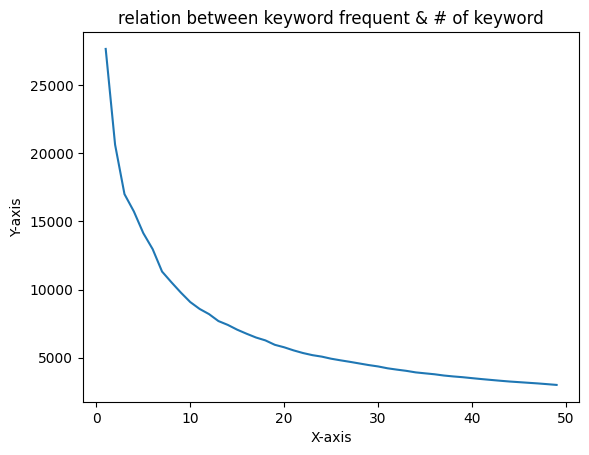

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# x축 데이터
x = list(range(1, 50))

# y축 데이터
y = np.array(len_of_keyword)

# 꺾은선 그래프 그리기
plt.plot(x, y)

# 그래프 제목 설정
plt.title("relation between keyword frequent & # of keyword")

# x축 레이블 설정
plt.xlabel("X-axis")

# y축 레이블 설정
plt.ylabel("Y-axis")

# 그래프 보여주기
plt.show()

#ke-t5 tokenizer

In [10]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import sentencepiece

tokenizer = AutoTokenizer.from_pretrained("KETI-AIR/ke-t5-small-ko")

model = AutoModelForSeq2SeqLM.from_pretrained("KETI-AIR/ke-t5-small-ko")

In [ ]:
tokenizer.SPECIAL_TOKENS_ATTRIBUTES
tokenizer.cls_token

Using cls_token, but it is not set yet.


In [11]:
print(len(keyword_sum))

keywords = [key for key in keyword_sum if not key.isdigit()]

print(len(keywords))
print("\n\n")

keywords_tokenized = []

for i, cur in enumerate(keywords):
  keywords_tokenized.extend( [tokenizer.convert_tokens_to_ids(tokenizer.tokenize(cur)) ] )

print(keywords_tokenized)

42277
27635



[[6214], [6977, 4322, 109], [5341, 34857], [46215], [4415], [40865], [8631, 21547], [28132], [3496, 11881], [1352, 11226, 19762], [7, 52414], [28302], [1508, 3924, 28541], [36325, 2974], [30592], [75], [45158, 2598], [24863], [8336, 44925], [6222, 1189, 1243], [932, 6106], [4293], [15679, 10415], [1170, 9067, 125], [26698], [44784], [34837, 63], [7, 2, 666, 1088], [4767, 59681], [20836], [1083, 629], [59664, 316], [17444], [26250, 25085], [7, 58606, 359, 113, 20266, 4508, 5506, 5708, 5123, 2878], [1552, 20732, 1567], [8372, 6347], [8929], [392, 775, 34, 434], [631, 809, 4209], [7150], [62406], [59, 838, 783], [3157, 13805, 15], [1508, 1768, 20784], [403, 4107, 4405, 3506, 753, 4690, 4156], [60323], [1300, 379, 132], [1475, 6106, 125], [61052, 11881], [6801, 8220], [59036], [13444, 8220], [685, 1254, 1893, 4609, 4296, 21594, 19918, 8416, 58147], [2572, 5963], [6537], [168, 311, 535], [14325], [55620], [879, 31, 18504], [706, 1128, 7, 51685, 4990, 10004, 3558, 3563, 30844,

In [12]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from tqdm import tqdm

mymodel = model.shared  # (shared): Embedding(64128, 512)

keyword_embedded = None

for i, cur in tqdm(enumerate(keywords_tokenized)):
  temp = mymodel(torch.Tensor(cur).to(torch.long)).detach().numpy() # [# of token, 512]
  temp = np.mean(temp, axis=0) #[512,]
  if(i==0):
    keyword_embedded = [temp]
  else:
    keyword_embedded = np.concatenate((keyword_embedded,[temp]))

print(keyword_embedded.shape)

27635it [04:32, 101.43it/s]

(27635, 512)


In [15]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# 모든 벡터 리스트
vectors = keyword_embedded  # 512차원의 벡터 27,000개가 들어있는 리스트

# 선택한 벡터 인덱스
selected_index = 15000  # 선택한 벡터의 인덱스

# 선택한 벡터
selected_vector = vectors[selected_index]

# 코사인 유사도 계산
similarities = cosine_similarity([selected_vector], vectors)

# 유사도 순서로 정렬한 인덱스
sorted_indices = np.argsort(similarities)[0][::-1]

# 상위 5개 벡터 인덱스 선택
top_similar_indices = sorted_indices[0:10]  # 제일 첫 번째는 자기 자신이므로 제외하고 상위 5개 선택

# 결과 출력
print(f"선택 단어: {keywords[selected_index]}")

for i, index in enumerate(top_similar_indices):
    print(f"유사 단어 {i}: {keywords[index]}, index: {index}")

선택 단어: 친구추가
유사 단어 0: 친구추가, index: 15000
유사 단어 1: 친구, index: 6984
유사 단어 2: 친구관계, index: 9352
유사 단어 3: 친구추천, index: 21075
유사 단어 4: 추가, index: 5078
유사 단어 5: 새친구, index: 20804
유사 단어 6: 친구유형, index: 1499
유사 단어 7: 친구소개, index: 16583
유사 단어 8: 플러스친구, index: 15600
유사 단어 9: 추가비용, index: 15996


In [ ]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits


# 2차원으로 차원 축소
n_components = 2

# t-sne 모델 생성
model = TSNE(n_components=n_components, perplexity=50)

# 학습한 결과 2차원 공간 값 출력
fin = model.fit_transform(keyword_embedded) #약 10분

In [ ]:
print(fin[:10])

[[ 68.143234   -6.9601064]
 [-14.016161   49.15114  ]
 [-35.905304   38.089016 ]
 [ 62.331356   -2.2208698]
 [-27.112757  -45.84054  ]
 [-69.51969   -59.650883 ]
 [-35.432404   65.18037  ]
 [ 45.06366   -35.425575 ]
 [ 20.397686   -4.300116 ]
 [ -9.931287  -26.295498 ]]


In [ ]:
from PIL import Image, ImageDraw

# 이미지 크기 설정
image_width = 800
image_height = 800

# 좌표 범위 설정
x_min = -100
x_max = 100
y_min = -100
y_max = 100

# 새로운 이미지 생성
image = Image.new("RGB", (image_width, image_height), "white")
draw = ImageDraw.Draw(image)

# 좌표 변환 함수
def transform_coordinate(x, y):
    # 이미지 크기에 맞게 좌표 변환
    image_x = int((x - x_min) / (x_max - x_min) * image_width)
    image_y = int((y_max - y) / (y_max - y_min) * image_height)
    return image_x, image_y

# 데이터 좌표 그리기
data = fin
point_radius = 3

for i, point in enumerate(data):

    color = 'blue'

    x, y = point
    image_x, image_y = transform_coordinate(x, y)
    x1 = image_x - point_radius
    y1 = image_y - point_radius
    x2 = image_x + point_radius
    y2 = image_y + point_radius
    draw.ellipse((x1, y1, x2, y2), fill=color, outline=color)

# 이미지 보여주기
image.show()

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

tensor = fin

# K-means 클러스터링
min_clusters = 8000  # 최소 클래스 개수
max_clusters = 8000  # 최대 클래스 개수
best_score = -1  # 최고 실루엣 스코어 초기값
best_clusters = min_clusters  # 최고 실루엣 스코어를 갖는 클래스 개수 초기값

for n_clusters in tqdm(range(min_clusters, max_clusters + 1,100)):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(tensor)
    silhouette_avg = silhouette_score(tensor, labels)

    if silhouette_avg > best_score:
        print(f"best cluster updated : {n_clusters}, score : {silhouette_avg}")
        best_score = silhouette_avg
        best_clusters = n_clusters
        best_labels = labels

# 최적의 클래스 개수 출력
print(f"최적의 클래스 개수: {best_clusters}, score : {best_score}")

In [ ]:
#print(labels) #길이 27635, [1793 3204 1516 ... 3695   73 1352]
print(best_clusters)
print(best_score)
print(best_labels)

8000
0.6292878
[2281 1212   60 ... 1808 4527 1310]


In [ ]:
np.where(best_labels == 2281 )

(array([    0,  9154, 11774, 13668, 22814, 25690]),)

In [ ]:
# 결과 출력
selected_index = 6000

print(f"선택 단어: {keywords[selected_index]}")

for i, index in enumerate(np.where( best_labels == best_labels[selected_index] )[0]):
    print(index)
    print(f"유사 단어 {i}: {keywords[index]}, index: {index}")

선택 단어: 키즈존
1699
유사 단어 0: 유키즈존, index: 1699
5308
유사 단어 1: 예스키즈존, index: 5308
6000
유사 단어 2: 키즈존, index: 6000
7310
유사 단어 3: 스쿨존, index: 7310
10464
유사 단어 4: 키즈 존, index: 10464
13285
유사 단어 5: 노키즈존, index: 13285


1000it [00:03, 277.92it/s]


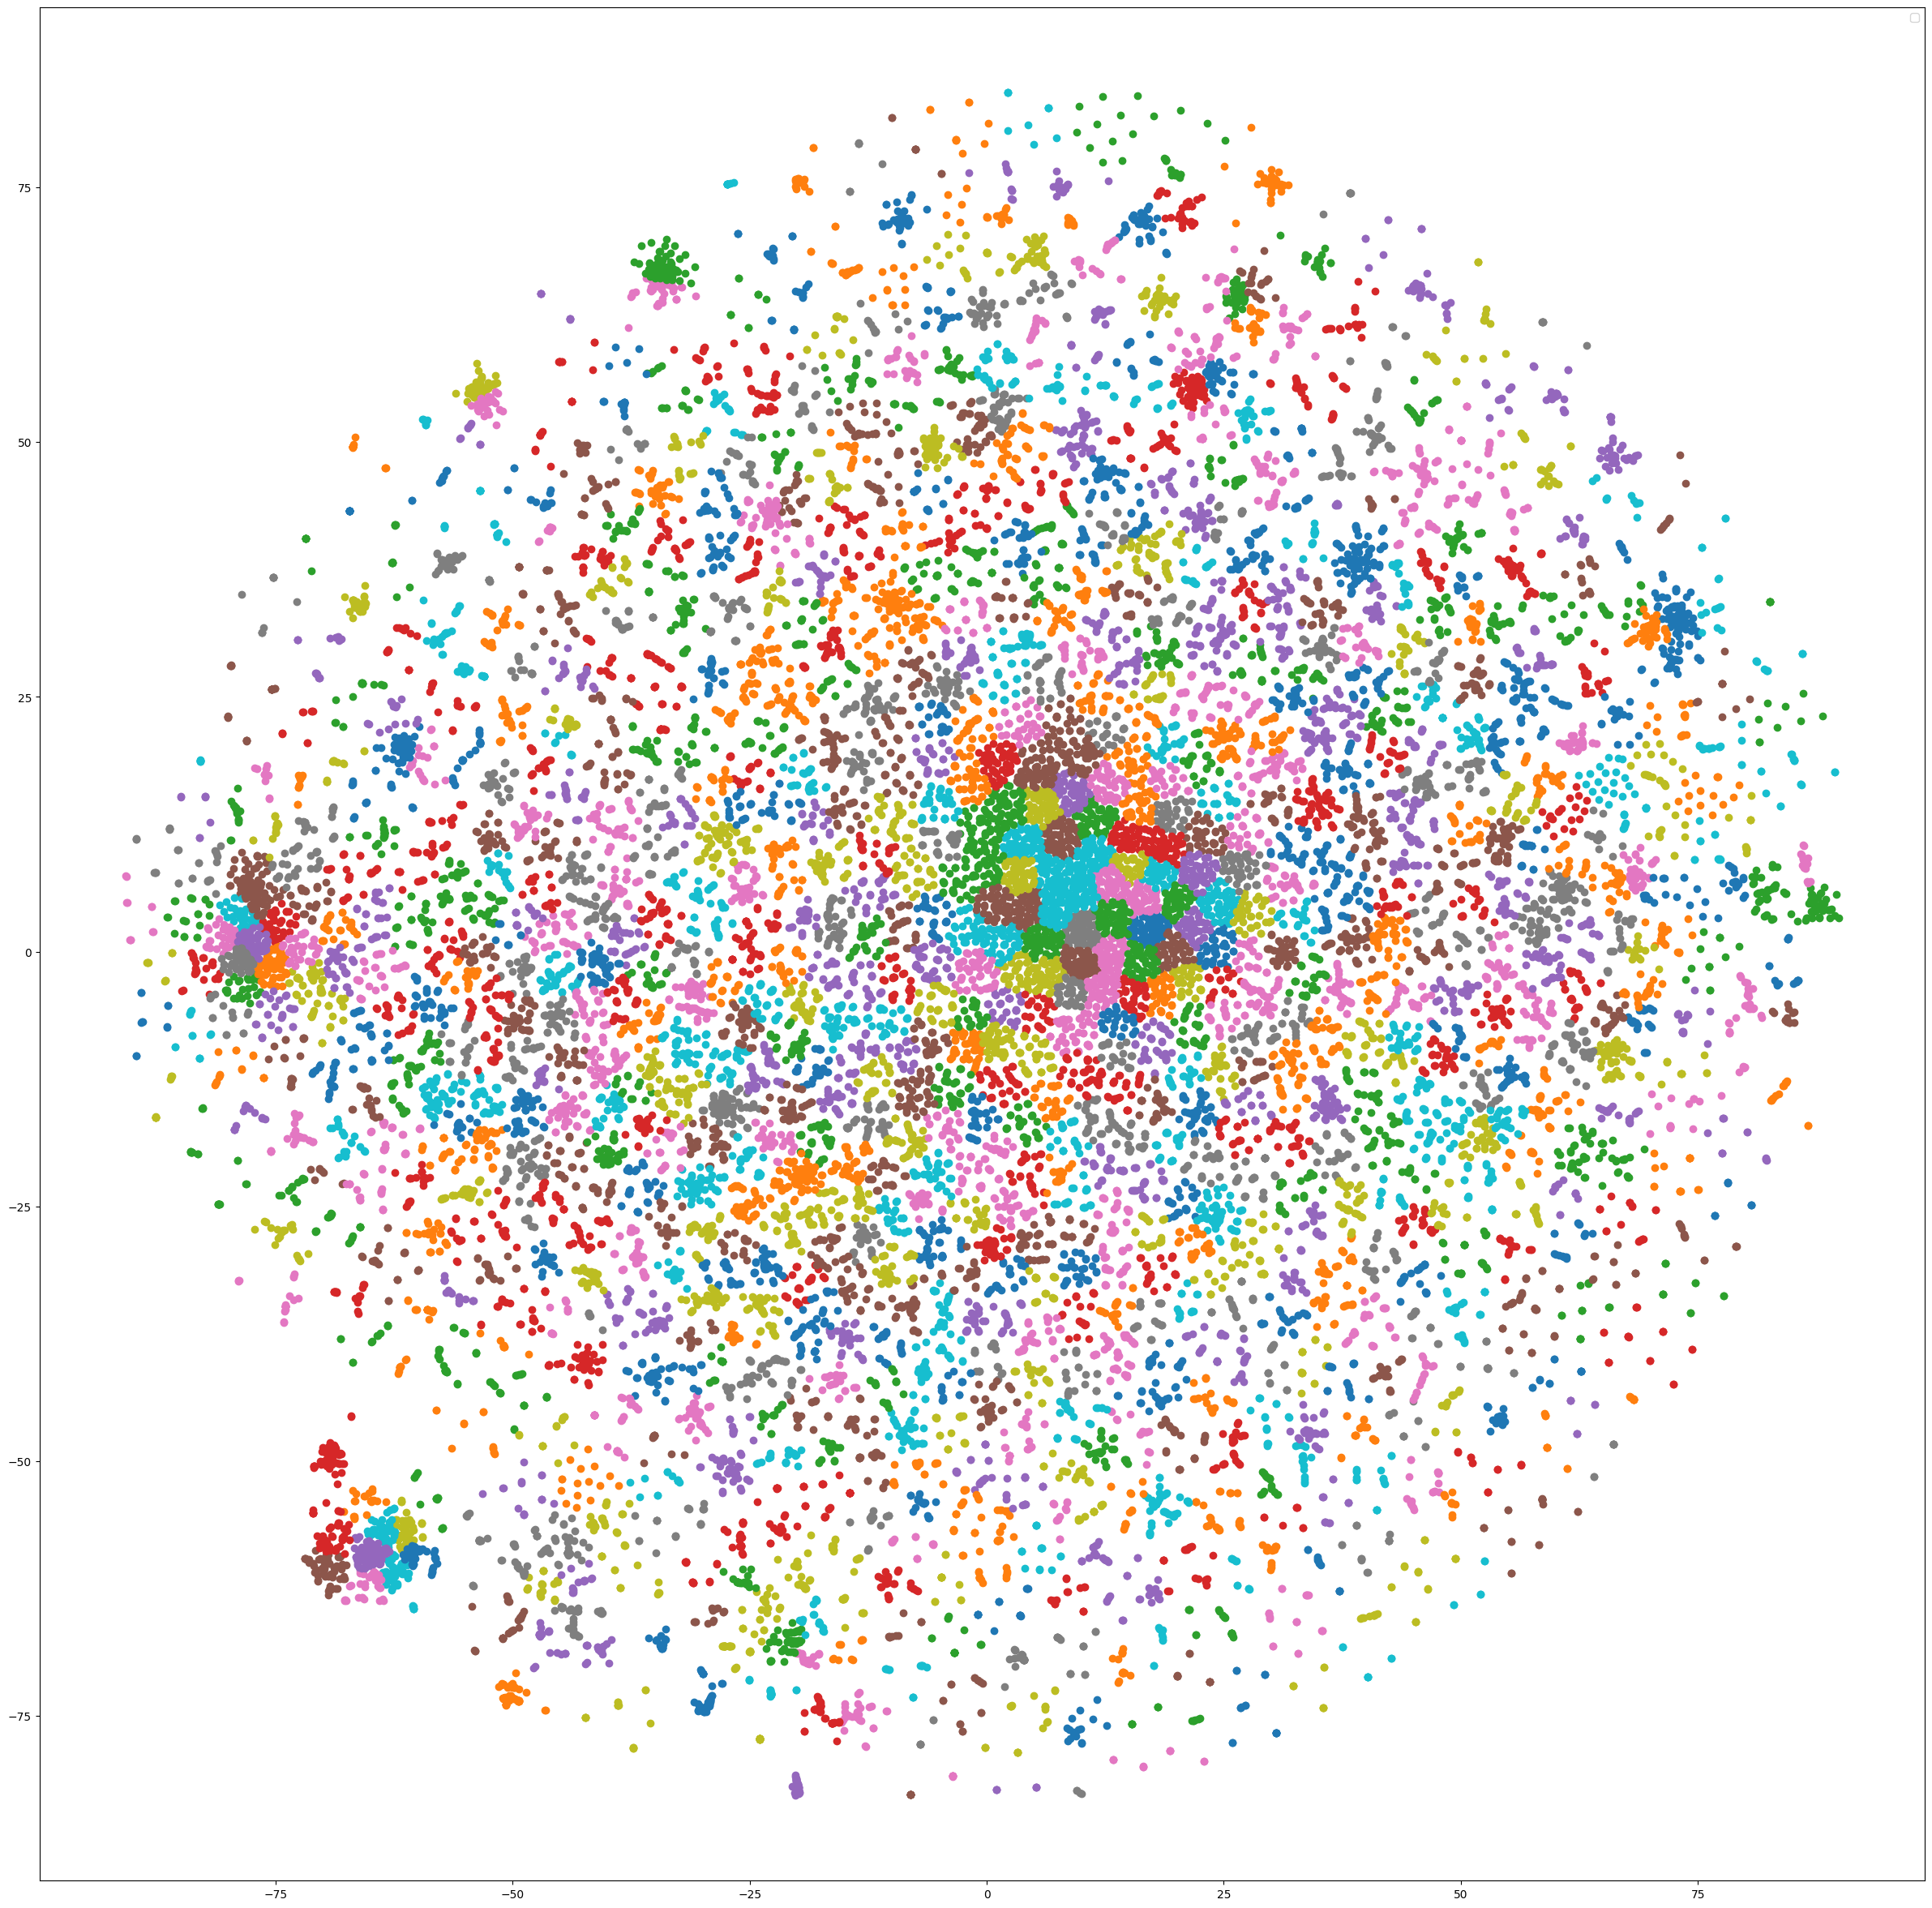

In [ ]:
# 클러스터링으로 class 구분한 자료 시각화
plt.figure(figsize=(30, 30))

data = fin
label = best_labels

label_groups = {}
for i in range(len(data)):
    label = labels[i]
    if label not in label_groups:
        label_groups[label] = []
    label_groups[label].append(data[i])

# 그래프 그리기
for i, (label, group) in tqdm(enumerate(label_groups.items())):
    group = np.array(group)
    plt.scatter(group[:, 0], group[:, 1]) #label=str(label))
    #if(i==1000):
    #  break


plt.legend()
plt.show()